## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import energyefficiencyDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0


## Dataset 


In [5]:
#Parameters 
n_features = 8
n_samples= 768
n_target = 1 

In [6]:
X,Y = energyefficiencyDataset.energy_data()

     X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.01),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 1.06985 | train_mse: 0.65339 | train_mae: 0.6163  |  0:00:00s


epoch 1  | loss: 0.2791  | train_mse: 0.33402 | train_mae: 0.44383 |  0:00:01s


epoch 2  | loss: 0.25414 | train_mse: 0.23816 | train_mae: 0.37778 |  0:00:01s


epoch 3  | loss: 0.2099  | train_mse: 0.24755 | train_mae: 0.39281 |  0:00:02s


epoch 4  | loss: 0.17648 | train_mse: 0.14895 | train_mae: 0.28481 |  0:00:03s


epoch 5  | loss: 0.1706  | train_mse: 0.16941 | train_mae: 0.32453 |  0:00:03s


epoch 6  | loss: 0.13924 | train_mse: 0.15144 | train_mae: 0.29772 |  0:00:04s


epoch 7  | loss: 0.13146 | train_mse: 0.11386 | train_mae: 0.22544 |  0:00:04s


epoch 8  | loss: 0.13778 | train_mse: 0.10018 | train_mae: 0.22799 |  0:00:05s


epoch 9  | loss: 0.11861 | train_mse: 0.06891 | train_mae: 0.20884 |  0:00:05s


epoch 10 | loss: 0.10821 | train_mse: 0.0537  | train_mae: 0.1721  |  0:00:06s


epoch 11 | loss: 0.10893 | train_mse: 0.06691 | train_mae: 0.19004 |  0:00:07s


epoch 12 | loss: 0.08964 | train_mse: 0.06325 | train_mae: 0.19079 |  0:00:07s


epoch 13 | loss: 0.08318 | train_mse: 0.04989 | train_mae: 0.16586 |  0:00:08s


epoch 14 | loss: 0.07388 | train_mse: 0.04689 | train_mae: 0.169   |  0:00:08s


epoch 15 | loss: 0.09368 | train_mse: 0.06242 | train_mae: 0.1884  |  0:00:09s


epoch 16 | loss: 0.10763 | train_mse: 0.04483 | train_mae: 0.15629 |  0:00:09s


epoch 17 | loss: 0.06729 | train_mse: 0.03628 | train_mae: 0.14627 |  0:00:10s


epoch 18 | loss: 0.06674 | train_mse: 0.03167 | train_mae: 0.13374 |  0:00:10s


epoch 19 | loss: 0.06609 | train_mse: 0.05251 | train_mae: 0.15577 |  0:00:11s


epoch 20 | loss: 0.05833 | train_mse: 0.02645 | train_mae: 0.12083 |  0:00:12s


epoch 21 | loss: 0.06607 | train_mse: 0.02264 | train_mae: 0.1128  |  0:00:12s


epoch 22 | loss: 0.05472 | train_mse: 0.02659 | train_mae: 0.11911 |  0:00:13s


epoch 23 | loss: 0.04674 | train_mse: 0.02919 | train_mae: 0.13219 |  0:00:13s


epoch 24 | loss: 0.05795 | train_mse: 0.02245 | train_mae: 0.11244 |  0:00:14s


epoch 25 | loss: 0.06814 | train_mse: 0.07782 | train_mae: 0.20634 |  0:00:15s


epoch 26 | loss: 0.06936 | train_mse: 0.14249 | train_mae: 0.23675 |  0:00:15s


epoch 27 | loss: 0.05471 | train_mse: 0.02191 | train_mae: 0.11262 |  0:00:16s


epoch 28 | loss: 0.05335 | train_mse: 0.02398 | train_mae: 0.11216 |  0:00:16s


epoch 29 | loss: 0.05927 | train_mse: 0.02321 | train_mae: 0.12301 |  0:00:17s


epoch 30 | loss: 0.06548 | train_mse: 0.03115 | train_mae: 0.13152 |  0:00:17s


epoch 31 | loss: 0.05248 | train_mse: 0.01745 | train_mae: 0.10152 |  0:00:18s


epoch 32 | loss: 0.04614 | train_mse: 0.01963 | train_mae: 0.11518 |  0:00:18s


epoch 33 | loss: 0.03856 | train_mse: 0.02794 | train_mae: 0.12702 |  0:00:19s


epoch 34 | loss: 0.05765 | train_mse: 0.02774 | train_mae: 0.13304 |  0:00:20s


epoch 35 | loss: 0.05587 | train_mse: 0.02941 | train_mae: 0.12408 |  0:00:20s


epoch 36 | loss: 0.05449 | train_mse: 0.02866 | train_mae: 0.12857 |  0:00:21s


epoch 37 | loss: 0.0609  | train_mse: 0.01188 | train_mae: 0.08294 |  0:00:21s


epoch 38 | loss: 0.04113 | train_mse: 0.01358 | train_mae: 0.09143 |  0:00:22s


epoch 39 | loss: 0.0632  | train_mse: 0.0423  | train_mae: 0.15337 |  0:00:22s


epoch 40 | loss: 0.07311 | train_mse: 0.03299 | train_mae: 0.13394 |  0:00:23s


epoch 41 | loss: 0.04632 | train_mse: 0.02151 | train_mae: 0.11319 |  0:00:23s


epoch 42 | loss: 0.06307 | train_mse: 0.02171 | train_mae: 0.10817 |  0:00:24s


epoch 43 | loss: 0.05    | train_mse: 0.01501 | train_mae: 0.09002 |  0:00:25s


epoch 44 | loss: 0.03836 | train_mse: 0.0187  | train_mae: 0.10395 |  0:00:25s


epoch 45 | loss: 0.0519  | train_mse: 0.02117 | train_mae: 0.11598 |  0:00:26s


epoch 46 | loss: 0.06388 | train_mse: 0.01354 | train_mae: 0.09053 |  0:00:26s


epoch 47 | loss: 0.05264 | train_mse: 0.01421 | train_mae: 0.09149 |  0:00:27s


epoch 48 | loss: 0.03217 | train_mse: 0.01301 | train_mae: 0.09222 |  0:00:28s


epoch 49 | loss: 0.02889 | train_mse: 0.01078 | train_mae: 0.08147 |  0:00:29s


epoch 50 | loss: 0.03065 | train_mse: 0.01898 | train_mae: 0.11295 |  0:00:29s


epoch 51 | loss: 0.03843 | train_mse: 0.01885 | train_mae: 0.11512 |  0:00:30s


epoch 52 | loss: 0.03127 | train_mse: 0.01546 | train_mae: 0.10251 |  0:00:31s


epoch 53 | loss: 0.05139 | train_mse: 0.01921 | train_mae: 0.10164 |  0:00:31s


epoch 54 | loss: 0.04549 | train_mse: 0.01415 | train_mae: 0.09128 |  0:00:32s


epoch 55 | loss: 0.0486  | train_mse: 0.01891 | train_mae: 0.10803 |  0:00:32s


epoch 56 | loss: 0.03229 | train_mse: 0.01064 | train_mae: 0.08289 |  0:00:33s


epoch 57 | loss: 0.03714 | train_mse: 0.01608 | train_mae: 0.1029  |  0:00:33s


epoch 58 | loss: 0.03918 | train_mse: 0.02406 | train_mae: 0.1255  |  0:00:34s


epoch 59 | loss: 0.02655 | train_mse: 0.02038 | train_mae: 0.11019 |  0:00:35s


epoch 60 | loss: 0.0313  | train_mse: 0.02408 | train_mae: 0.13376 |  0:00:35s


epoch 61 | loss: 0.04878 | train_mse: 0.01528 | train_mae: 0.09578 |  0:00:36s


epoch 62 | loss: 0.03697 | train_mse: 0.01453 | train_mae: 0.09369 |  0:00:36s


epoch 63 | loss: 0.03004 | train_mse: 0.01593 | train_mae: 0.09842 |  0:00:37s


epoch 64 | loss: 0.03644 | train_mse: 0.01535 | train_mae: 0.09746 |  0:00:37s


epoch 65 | loss: 0.04276 | train_mse: 0.02505 | train_mae: 0.10964 |  0:00:38s


epoch 66 | loss: 0.04188 | train_mse: 0.01745 | train_mae: 0.09499 |  0:00:39s


epoch 67 | loss: 0.03745 | train_mse: 0.03165 | train_mae: 0.12813 |  0:00:39s


epoch 68 | loss: 0.02747 | train_mse: 0.01593 | train_mae: 0.09849 |  0:00:40s


epoch 69 | loss: 0.02849 | train_mse: 0.01621 | train_mae: 0.10484 |  0:00:40s


epoch 70 | loss: 0.03953 | train_mse: 0.0136  | train_mae: 0.08896 |  0:00:41s


epoch 71 | loss: 0.02996 | train_mse: 0.01762 | train_mae: 0.10889 |  0:00:41s


epoch 72 | loss: 0.03084 | train_mse: 0.02965 | train_mae: 0.14209 |  0:00:42s


epoch 73 | loss: 0.04887 | train_mse: 0.01636 | train_mae: 0.0993  |  0:00:43s


epoch 74 | loss: 0.04861 | train_mse: 0.02559 | train_mae: 0.11697 |  0:00:43s


epoch 75 | loss: 0.03772 | train_mse: 0.02472 | train_mae: 0.11359 |  0:00:44s


epoch 76 | loss: 0.04195 | train_mse: 0.01453 | train_mae: 0.10015 |  0:00:44s


epoch 77 | loss: 0.0634  | train_mse: 0.01224 | train_mae: 0.08896 |  0:00:45s


epoch 78 | loss: 0.03472 | train_mse: 0.02053 | train_mae: 0.11403 |  0:00:45s


epoch 79 | loss: 0.02884 | train_mse: 0.00843 | train_mae: 0.07083 |  0:00:46s


epoch 80 | loss: 0.03328 | train_mse: 0.01353 | train_mae: 0.08647 |  0:00:46s


epoch 81 | loss: 0.03975 | train_mse: 0.02373 | train_mae: 0.12359 |  0:00:47s


epoch 82 | loss: 0.03407 | train_mse: 0.01348 | train_mae: 0.09115 |  0:00:48s


epoch 83 | loss: 0.03656 | train_mse: 0.01498 | train_mae: 0.09362 |  0:00:49s


epoch 84 | loss: 0.03711 | train_mse: 0.01379 | train_mae: 0.08759 |  0:00:49s


epoch 85 | loss: 0.04004 | train_mse: 0.01172 | train_mae: 0.08177 |  0:00:50s


epoch 86 | loss: 0.03057 | train_mse: 0.02108 | train_mae: 0.11203 |  0:00:50s


epoch 87 | loss: 0.03883 | train_mse: 0.01335 | train_mae: 0.08473 |  0:00:51s


epoch 88 | loss: 0.04848 | train_mse: 0.02863 | train_mae: 0.14093 |  0:00:52s


epoch 89 | loss: 0.038   | train_mse: 0.02089 | train_mae: 0.11894 |  0:00:52s


epoch 90 | loss: 0.02732 | train_mse: 0.01128 | train_mae: 0.0828  |  0:00:53s


epoch 91 | loss: 0.0235  | train_mse: 0.01453 | train_mae: 0.09551 |  0:00:53s


epoch 92 | loss: 0.0257  | train_mse: 0.01085 | train_mae: 0.07929 |  0:00:54s


epoch 93 | loss: 0.03306 | train_mse: 0.0157  | train_mae: 0.09753 |  0:00:54s


epoch 94 | loss: 0.03158 | train_mse: 0.01403 | train_mae: 0.08527 |  0:00:55s


epoch 95 | loss: 0.0391  | train_mse: 0.00963 | train_mae: 0.0729  |  0:00:56s


epoch 96 | loss: 0.03151 | train_mse: 0.00753 | train_mae: 0.06575 |  0:00:56s


epoch 97 | loss: 0.02428 | train_mse: 0.0119  | train_mae: 0.0853  |  0:00:57s


epoch 98 | loss: 0.02418 | train_mse: 0.01247 | train_mae: 0.09027 |  0:00:58s


epoch 99 | loss: 0.03775 | train_mse: 0.01391 | train_mae: 0.083   |  0:00:58s


epoch 100| loss: 0.03553 | train_mse: 0.01053 | train_mae: 0.07556 |  0:00:59s


epoch 101| loss: 0.02668 | train_mse: 0.01016 | train_mae: 0.0797  |  0:00:59s


epoch 102| loss: 0.0388  | train_mse: 0.01899 | train_mae: 0.09506 |  0:01:00s


epoch 103| loss: 0.02794 | train_mse: 0.00687 | train_mae: 0.06296 |  0:01:00s


epoch 104| loss: 0.03029 | train_mse: 0.02367 | train_mae: 0.13039 |  0:01:01s


epoch 105| loss: 0.04168 | train_mse: 0.02589 | train_mae: 0.11915 |  0:01:02s


epoch 106| loss: 0.04067 | train_mse: 0.02995 | train_mae: 0.10692 |  0:01:02s


epoch 107| loss: 0.04317 | train_mse: 0.0203  | train_mae: 0.1092  |  0:01:03s


epoch 108| loss: 0.04056 | train_mse: 0.01627 | train_mae: 0.09013 |  0:01:03s


epoch 109| loss: 0.0402  | train_mse: 0.02154 | train_mae: 0.11307 |  0:01:04s


epoch 110| loss: 0.03783 | train_mse: 0.01991 | train_mae: 0.1133  |  0:01:04s


epoch 111| loss: 0.02897 | train_mse: 0.01438 | train_mae: 0.09325 |  0:01:05s


epoch 112| loss: 0.02796 | train_mse: 0.01172 | train_mae: 0.0876  |  0:01:06s


epoch 113| loss: 0.02705 | train_mse: 0.01079 | train_mae: 0.07969 |  0:01:06s


epoch 114| loss: 0.03015 | train_mse: 0.01357 | train_mae: 0.08787 |  0:01:07s


epoch 115| loss: 0.02952 | train_mse: 0.01222 | train_mae: 0.08212 |  0:01:07s


epoch 116| loss: 0.02982 | train_mse: 0.00996 | train_mae: 0.07465 |  0:01:08s


epoch 117| loss: 0.03586 | train_mse: 0.01793 | train_mae: 0.09268 |  0:01:08s


epoch 118| loss: 0.02663 | train_mse: 0.01479 | train_mae: 0.09107 |  0:01:09s


epoch 119| loss: 0.04067 | train_mse: 0.00868 | train_mae: 0.06967 |  0:01:10s


epoch 120| loss: 0.03457 | train_mse: 0.01774 | train_mae: 0.10387 |  0:01:10s


epoch 121| loss: 0.03388 | train_mse: 0.01046 | train_mae: 0.08436 |  0:01:11s


epoch 122| loss: 0.03188 | train_mse: 0.06867 | train_mae: 0.1603  |  0:01:11s


epoch 123| loss: 0.02741 | train_mse: 0.03429 | train_mae: 0.11032 |  0:01:12s


epoch 124| loss: 0.02882 | train_mse: 0.00925 | train_mae: 0.08096 |  0:01:12s


epoch 125| loss: 0.02651 | train_mse: 0.00596 | train_mae: 0.06021 |  0:01:13s


epoch 126| loss: 0.02844 | train_mse: 0.01199 | train_mae: 0.08076 |  0:01:14s


epoch 127| loss: 0.03497 | train_mse: 0.00875 | train_mae: 0.07189 |  0:01:14s


epoch 128| loss: 0.02724 | train_mse: 0.01097 | train_mae: 0.07618 |  0:01:15s


epoch 129| loss: 0.03034 | train_mse: 0.02491 | train_mae: 0.13119 |  0:01:15s


epoch 130| loss: 0.01834 | train_mse: 0.00651 | train_mae: 0.06167 |  0:01:16s


epoch 131| loss: 0.0275  | train_mse: 0.01305 | train_mae: 0.09635 |  0:01:16s


epoch 132| loss: 0.03575 | train_mse: 0.01214 | train_mae: 0.08861 |  0:01:17s


epoch 133| loss: 0.02731 | train_mse: 0.01417 | train_mae: 0.08806 |  0:01:18s


epoch 134| loss: 0.0347  | train_mse: 0.01742 | train_mae: 0.10376 |  0:01:18s


epoch 135| loss: 0.03092 | train_mse: 0.01686 | train_mae: 0.10464 |  0:01:19s


epoch 136| loss: 0.04204 | train_mse: 0.01026 | train_mae: 0.07652 |  0:01:19s


epoch 137| loss: 0.0243  | train_mse: 0.01029 | train_mae: 0.08242 |  0:01:20s


epoch 138| loss: 0.02963 | train_mse: 0.00615 | train_mae: 0.05961 |  0:01:20s


epoch 139| loss: 0.02571 | train_mse: 0.01106 | train_mae: 0.07823 |  0:01:21s


epoch 140| loss: 0.02766 | train_mse: 0.01289 | train_mae: 0.09301 |  0:01:21s


epoch 141| loss: 0.02561 | train_mse: 0.01882 | train_mae: 0.10918 |  0:01:22s


epoch 142| loss: 0.02441 | train_mse: 0.00822 | train_mae: 0.0686  |  0:01:23s


epoch 143| loss: 0.02472 | train_mse: 0.01158 | train_mae: 0.08139 |  0:01:23s


epoch 144| loss: 0.03765 | train_mse: 0.0108  | train_mae: 0.08151 |  0:01:24s


epoch 145| loss: 0.03435 | train_mse: 0.01309 | train_mae: 0.08849 |  0:01:24s


epoch 146| loss: 0.04774 | train_mse: 0.01402 | train_mae: 0.08206 |  0:01:25s


epoch 147| loss: 0.03602 | train_mse: 0.07145 | train_mae: 0.13976 |  0:01:25s


epoch 148| loss: 0.03001 | train_mse: 0.06198 | train_mae: 0.13819 |  0:01:26s


epoch 149| loss: 0.02811 | train_mse: 0.00883 | train_mae: 0.07326 |  0:01:26s


epoch 150| loss: 0.02593 | train_mse: 0.01551 | train_mae: 0.09822 |  0:01:27s


epoch 151| loss: 0.02325 | train_mse: 0.01588 | train_mae: 0.09726 |  0:01:28s


epoch 152| loss: 0.03663 | train_mse: 0.02849 | train_mae: 0.12521 |  0:01:28s


epoch 153| loss: 0.02513 | train_mse: 0.01087 | train_mae: 0.08181 |  0:01:29s


epoch 154| loss: 0.03934 | train_mse: 0.00694 | train_mae: 0.0608  |  0:01:29s


epoch 155| loss: 0.03264 | train_mse: 0.00935 | train_mae: 0.07638 |  0:01:30s


epoch 156| loss: 0.03174 | train_mse: 0.01046 | train_mae: 0.07587 |  0:01:31s


epoch 157| loss: 0.02072 | train_mse: 0.0105  | train_mae: 0.07985 |  0:01:31s


epoch 158| loss: 0.03363 | train_mse: 0.009   | train_mae: 0.07043 |  0:01:32s


epoch 159| loss: 0.03552 | train_mse: 0.02341 | train_mae: 0.11235 |  0:01:33s


epoch 160| loss: 0.04711 | train_mse: 0.01783 | train_mae: 0.10954 |  0:01:33s


epoch 161| loss: 0.02127 | train_mse: 0.01391 | train_mae: 0.09291 |  0:01:34s


epoch 162| loss: 0.03667 | train_mse: 0.02606 | train_mae: 0.12321 |  0:01:35s


epoch 163| loss: 0.03137 | train_mse: 0.02009 | train_mae: 0.09468 |  0:01:36s


epoch 164| loss: 0.07881 | train_mse: 0.06389 | train_mae: 0.16336 |  0:01:36s


epoch 165| loss: 0.07536 | train_mse: 0.06304 | train_mae: 0.16463 |  0:01:37s


epoch 166| loss: 0.06762 | train_mse: 0.08862 | train_mae: 0.19999 |  0:01:37s


epoch 167| loss: 0.09157 | train_mse: 0.11305 | train_mae: 0.26081 |  0:01:38s


epoch 168| loss: 0.07505 | train_mse: 0.11172 | train_mae: 0.26443 |  0:01:39s


epoch 169| loss: 0.07121 | train_mse: 0.05394 | train_mae: 0.18431 |  0:01:39s


epoch 170| loss: 0.06814 | train_mse: 0.02974 | train_mae: 0.13296 |  0:01:40s


epoch 171| loss: 0.0342  | train_mse: 0.01937 | train_mae: 0.10165 |  0:01:40s


epoch 172| loss: 0.04336 | train_mse: 0.03314 | train_mae: 0.12916 |  0:01:41s


epoch 173| loss: 0.05184 | train_mse: 0.02015 | train_mae: 0.10144 |  0:01:41s


epoch 174| loss: 0.03834 | train_mse: 0.05006 | train_mae: 0.18099 |  0:01:42s


epoch 175| loss: 0.03215 | train_mse: 0.03827 | train_mae: 0.14439 |  0:01:43s


epoch 176| loss: 0.06113 | train_mse: 0.02745 | train_mae: 0.12639 |  0:01:43s


epoch 177| loss: 0.0468  | train_mse: 0.06705 | train_mae: 0.18619 |  0:01:44s


epoch 178| loss: 0.05216 | train_mse: 0.0667  | train_mae: 0.19712 |  0:01:44s


epoch 179| loss: 0.05206 | train_mse: 0.02159 | train_mae: 0.10503 |  0:01:45s


epoch 180| loss: 0.03809 | train_mse: 0.0284  | train_mae: 0.10695 |  0:01:45s


epoch 181| loss: 0.03529 | train_mse: 0.02213 | train_mae: 0.09806 |  0:01:46s


epoch 182| loss: 0.03081 | train_mse: 0.01868 | train_mae: 0.10126 |  0:01:47s


epoch 183| loss: 0.03425 | train_mse: 0.01625 | train_mae: 0.08694 |  0:01:47s


epoch 184| loss: 0.04707 | train_mse: 0.02118 | train_mae: 0.10057 |  0:01:48s


epoch 185| loss: 0.03682 | train_mse: 0.01511 | train_mae: 0.08794 |  0:01:48s


epoch 186| loss: 0.03517 | train_mse: 0.0235  | train_mae: 0.11191 |  0:01:49s


epoch 187| loss: 0.03682 | train_mse: 0.02537 | train_mae: 0.1093  |  0:01:49s


epoch 188| loss: 0.03707 | train_mse: 0.03024 | train_mae: 0.11821 |  0:01:50s

Early stopping occurred at epoch 188 with best_epoch = 138 and best_train_mae = 0.05961
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.06380606873077473


ABC Pre-generator MAE 0.09078318444417363


# mGAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

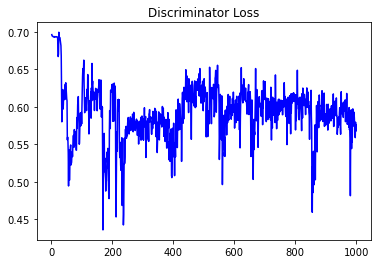

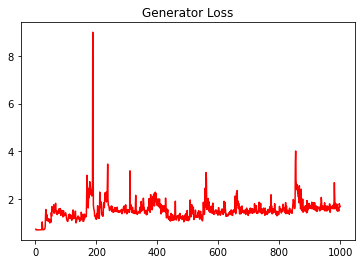

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MAE")
print(mean(ABC_GAN1_metrics[1]))

MAE
0.07089775063968325


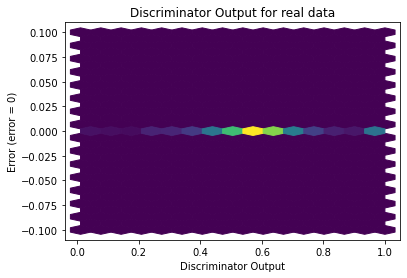

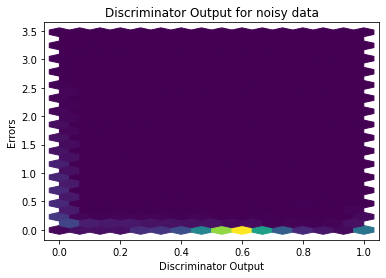

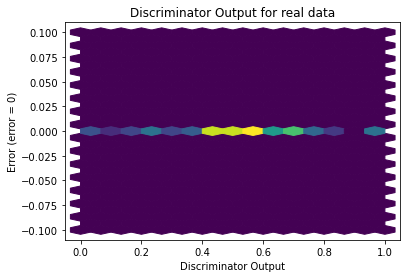

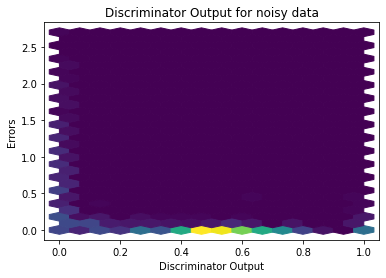

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.01, betas=(0.5, 0.999))

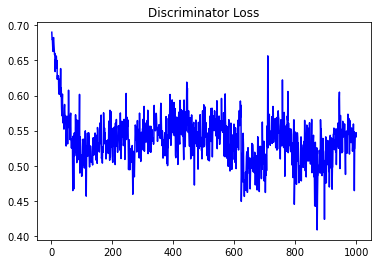

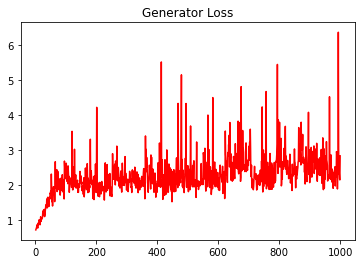

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.06510425159417384


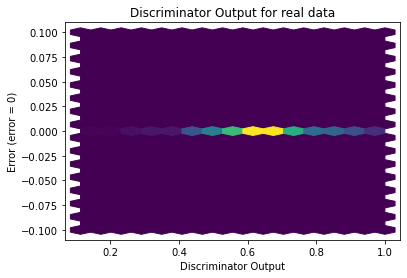

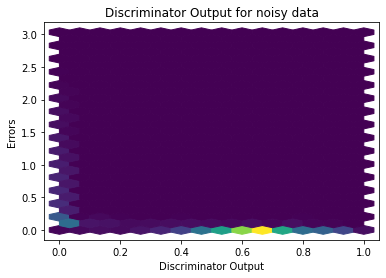

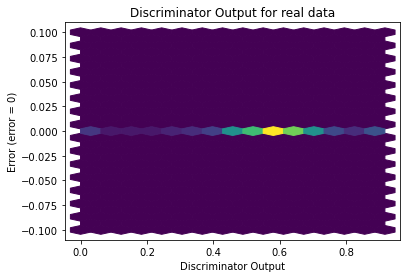

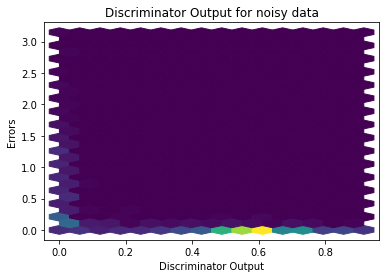

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


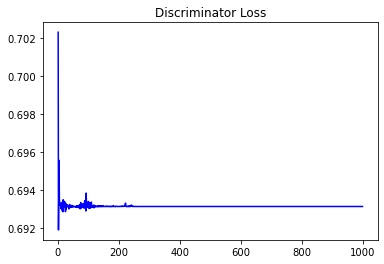

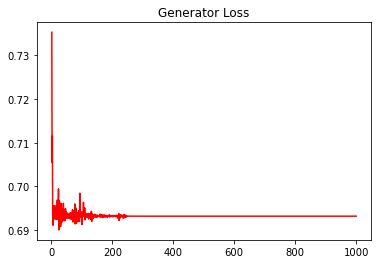

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MAE")
print(mean(ABC_GAN3_metrics[1]))

MAE
0.1349019721538651


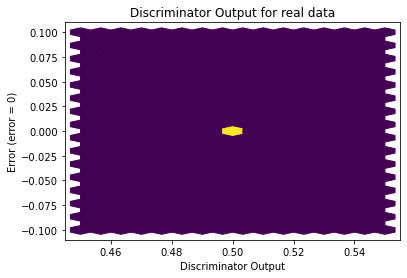

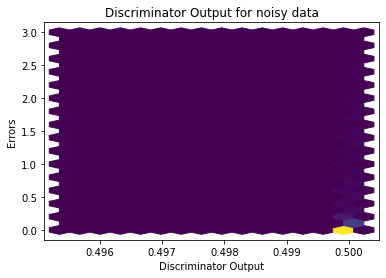

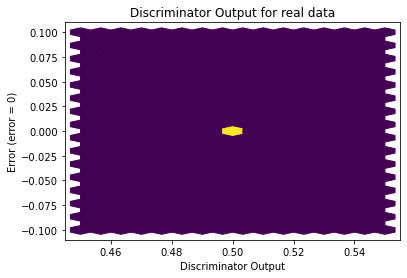

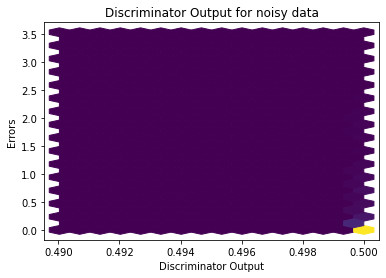

In [22]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.01, betas=(0.5, 0.999))


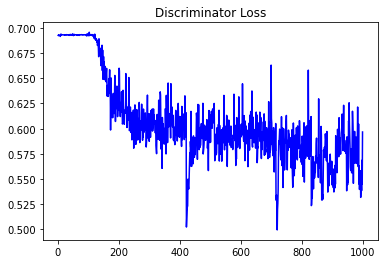

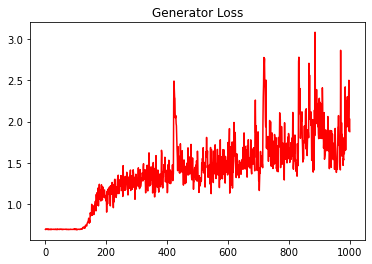

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.06526376578984623


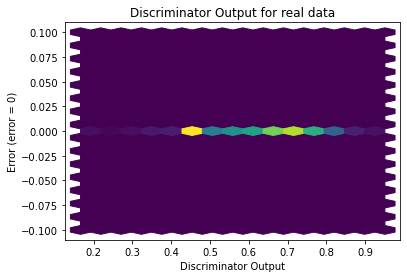

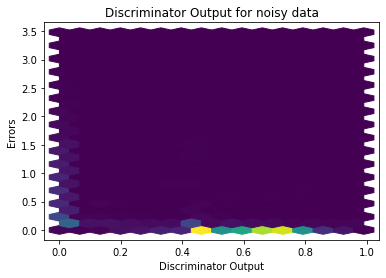

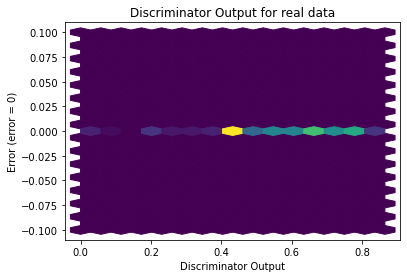

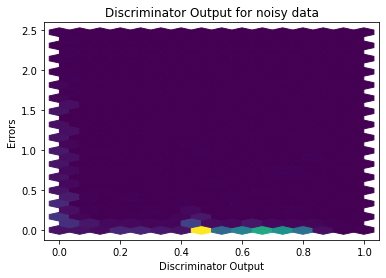

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0665]], requires_grad=True)


## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1287]], requires_grad=True)
